# Testing and regularization

In [2]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

fatal: destination path 'machine_learning_1' already exists and is not an empty directory.
/content/machine_learning_1/polynomial_regression


In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

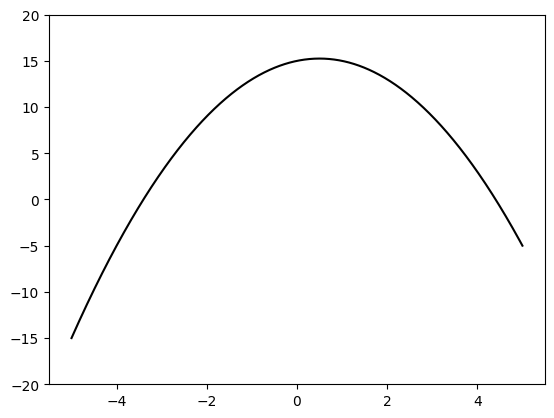

In [4]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [5]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

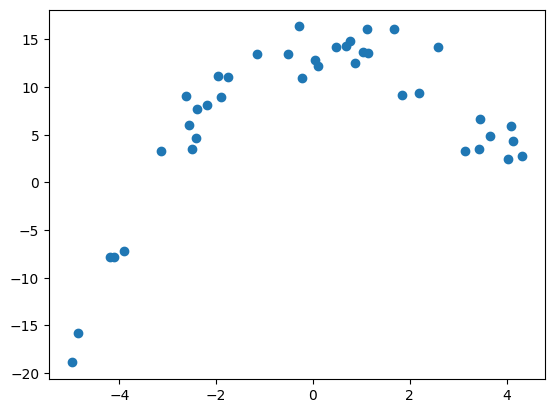

In [6]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [7]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [8]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly = PolynomialFeatures ( 200 , include_bias = False)
    X = poly.fit_transform (X.reshape(-1,1))
    return X
X_poly=addPoly(X,200)

In [9]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

## Splitting data into training and testing

In [10]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly,Y , test_size = 0.2)

In [11]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

---



In [12]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data
# normalization trick ;)
model_no_reg =  LinearRegression ().fit (X_poly,Y)


Training error (rmse): 5.868137748760215
Testing error (rmse): 6.7765639581714


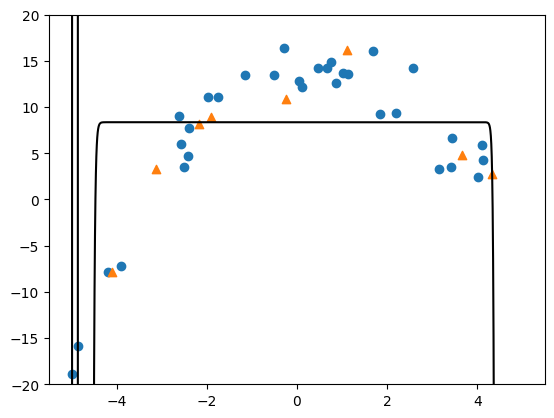

Polynomial coefficients
[8.36146053755051, 5.282590211407906e-131, 6.091815434037771e-138, -3.1892646827663993e-136, -2.9638506532063405e-136, 1.9964673706244316e-136, 5.3341725035203245e-136, -1.730857970432328e-136, -5.305744435541878e-140, -5.875681434413842e-139, -6.259969522296054e-142, -2.960280064537733e-142, -7.691315829912959e-142, -8.537413255108441e-142, -1.1427775065444273e-140, 3.526228913884092e-140, -1.1680401670362419e-141, -1.2952042705113802e-141, 5.445153485625668e-140, -1.59258304622169e-141, -1.7659945462796746e-141, -1.9655650995269612e-141, -2.1725995884522466e-141, -2.4031325806478753e-141, -2.682566477956549e-141, -3.1296605548023934e-141, -3.576754609045874e-141, -7.15350859244078e-141, 5.474445963391292e-147, 9.131066370852049e-147, 1.873998063761611e-146, 3.0843388819322187e-146, 6.372654385150176e-146, 1.0408851635496057e-145, 2.1687074868564656e-145, 3.499439425531872e-145, 7.405792631713595e-145, 1.1640135290979528e-144, 2.3584902055003844e-144, 3.1955879

In [13]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

*   List item
*   List item



In [14]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data
# normalization trick ;)
model_L1_reg = linear_model.Lasso (alpha=0.01)
model_L1_reg.fit(X_poly, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.626e+01, tolerance: 2.748e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

Training error (rmse): 1.8972825317705289
Testing error (rmse): 1.4259392491051333


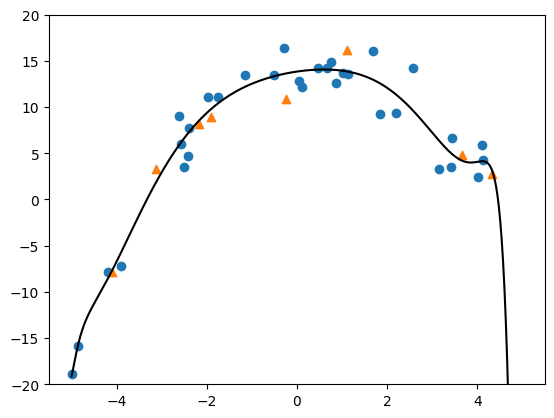

Polynomial coefficients
[13.845683000575029, 0.7153081253242718, -0.5499833698930842, -0.00630197960103084, -0.06290989895010225, -0.0015318554631149617, 0.0010566662777657377, 0.00017191321078867036, 6.1446618826259e-05, 7.067703173184851e-06, 1.7826665675145207e-06, 1.5917397790018695e-07, 2.9311895484596077e-08, 4.83807064650023e-10, -3.4132397797979784e-10, -1.7783044494670665e-10, -5.687478408838757e-11, -1.2495976976246211e-11, -3.289763322850418e-12, -6.181058658083152e-13, -1.4920926842253638e-13, -2.6380111081755912e-14, -6.030040439548512e-15, -1.0358263501806809e-15, -2.276175044242045e-16, -3.853895359460265e-17, -8.21232707103822e-18, -1.3808945538960449e-18, -2.8693685411980045e-19, -4.812614414563072e-20, -9.788203890510044e-21, -1.642093411746132e-21, -3.2776268961349797e-22, -5.510344186630251e-23, -1.081385560763107e-23, -1.8245217137113157e-24, -3.5247776681851407e-25, -5.975582237675426e-26, -1.1372878689616823e-26, -1.9395694820594368e-27, -3.6377916513887965e-28, 

In [15]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [19]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data
# normalization trick ;)
model_L2_reg = linear_model.Ridge(alpha=0.01)
model_L2_reg.fit(X_poly, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Ridge(alpha=0.01)

Training error (rmse): 5.880915534116182
Testing error (rmse): 7.011174944488331


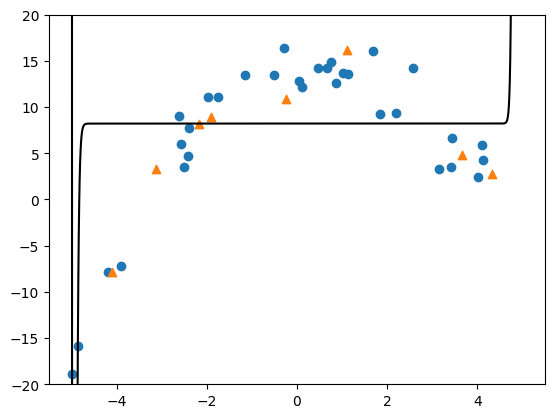

Polynomial coefficients
[8.213783148689298, 8.552323946598946e-269, -2.904022851882518e-268, 2.0114869807408174e-267, -8.10999111655229e-267, 4.716838458507692e-266, -2.0364386819924298e-265, 1.105249905422573e-264, -4.962409170952237e-264, 2.5946694948464537e-263, -1.1938998992364699e-262, 6.101834218882168e-262, -2.853113916775665e-261, 1.4366880354356575e-260, -6.790944366600283e-260, 3.3853488838554605e-259, -1.6122404941039078e-258, 7.98109170674381e-258, -3.821092565554611e-257, 1.8821884694519822e-256, -9.045547288459428e-256, 4.439742736080024e-255, -2.139552248102957e-254, 1.0474062822366957e-253, -5.057703005051637e-253, 2.4712359977961227e-252, -1.1950767799542177e-251, 5.830963337681478e-251, -2.822921580711663e-250, 1.3758873667781452e-249, -6.666476993761877e-249, 3.24663956904603e-248, -1.5740285017831563e-247, 7.661042486941567e-247, -3.715904222458934e-246, 1.8077547982396132e-245, -8.771305829074686e-245, 4.265649862071915e-244, -2.0702384555209366e-243, 1.00651845212

In [20]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [21]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-4.101756,-7.821475,8.361459,8.213783,8.213783
1,-0.234030,10.927272,8.361461,8.213783,8.213783
2,3.653099,4.833669,8.361461,8.213783,8.213783
3,4.328338,2.748648,2.747948,8.213783,8.213783
4,1.108870,16.141450,8.361461,8.213783,8.213783
5,-1.898524,8.956020,8.361461,8.213783,8.213783
6,-2.181622,8.160123,8.361461,8.213783,8.213783
7,-3.132705,3.308124,8.361461,8.213783,8.213783


### Real Example (Predict fuel efficiency)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [23]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [24]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [28]:
!pip install -U scikit-learn

#### normal linear regression

In [30]:
from sklearn.linear_model import LinearRegression
# normal linear regression
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]
X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

model_no_reg = LinearRegression()
model_no_reg.fit(X_train, y_train)
ytest_predict=model_no_reg.predict(X_test)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.5639128558497175


#### using 50th order

In [31]:
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X
X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)

##### no regularization

In [33]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

94.67301043216226


##### lasso regularization

In [34]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.01)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3.730447503028277


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.200e+03, tolerance: 1.870e+00
  model = cd_fast.enet_coordinate_descent(


##### ridge regularization

In [35]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.01)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

30.11233495284351
